In [3]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from lacbox.io import ReadHAWC2
from lacbox.test import test_data_path

fname = Path(test_data_path) / 'dtu_10mw_turb.hdf5'


In [4]:
h2res = ReadHAWC2(fname)
# print all (public) attributes just for info
h2res.__dict__.keys()

dict_keys(['fname', 'data', 'chaninfo', 'nrch', 'nrsc', 'freq', 'fformat', 't', 'gtsdf_description'])

In [5]:
names, units, desc = h2res.chaninfo
print('There are', len(names), 'channels in this output file.')
print(names)

There are 119 channels in this output file.
['Time', 'bea1 angle', 'bea1 angle_speed', 'bea2 angle', 'bea2 angle_speed', 'bea2 angle', 'bea2 angle_speed', 'bea2 angle', 'bea2 angle_speed', 'Omega', 'Ae rot. torque', 'Ae rot. power', 'Ae rot. thrust', 'WSP gl. coo.,Vx', 'WSP gl. coo.,Vy', 'WSP gl. coo.,Vz', 'WSP gl. coo.,Abs_vhor', 'WSP gl. coo.,Vdir_hor', 'Mx coo: tower', 'My coo: tower', 'Mz coo: tower', 'Mx coo: tower', 'My coo: tower', 'Mz coo: tower', 'Mx coo: shaft', 'My coo: shaft', 'Mz coo: shaft', 'Mx coo: hub1', 'My coo: hub1', 'Mz coo: hub1', 'Mx coo: hub2', 'My coo: hub2', 'Mz coo: hub2', 'Mx coo: hub3', 'My coo: hub3', 'Mz coo: hub3', 'Mx coo: blade1', 'My coo: blade1', 'Mz coo: blade1', 'Mx coo: blade2', 'My coo: blade2', 'Mz coo: blade2', 'Mx coo: blade3', 'My coo: blade3', 'Mz coo: blade3', 'Mx coo: local', 'My coo: local', 'Mz coo: local', 'Mx coo: local', 'My coo: local', 'Mz coo: local', 'Mx coo: local', 'My coo: local', 'Mz coo: local', 'State pos x  coo: global', 'S

In [6]:
# find the indices that we think correspond to flapwise blade moment
idx_blades = np.where(['Mx coo: blade' in name for name in names])[0]
print('Identified indices of blade channels are', idx_blades)

# print the corresponding description
[print(desc[i]) for i in idx_blades]

# print the coresponding units
[print(units[i]) for i in idx_blades];

Identified indices of blade channels are [36 39 42]
MomentMx Mbdy:blade1 nodenr:   3 coo: blade1  blade 1 root flped
MomentMx Mbdy:blade2 nodenr:   3 coo: blade2  blade 2 root flped
MomentMx Mbdy:blade3 nodenr:   3 coo: blade3  blade 3 root flped
kNm
kNm
kNm


Mean values:
-22465.094595711264
-22456.09700028483
-22459.30246698405


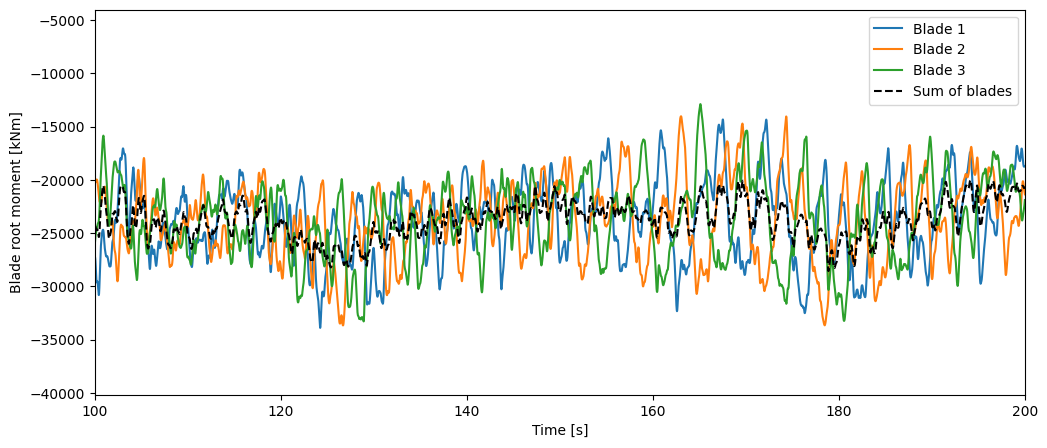

In [7]:
# assign the relevant data to variables for convenience
Mx1, Mx2, Mx3 = h2res.data[:, idx_blades].T

# calculate statistics
print('Mean values:')
[print(Mx.mean()) for Mx in [Mx1, Mx2, Mx3]]
Mx_mean = h2res.data[:, idx_blades].mean(axis=1)

# plot the time series
fig, ax = plt.subplots(figsize=(12, 5))
handles = ax.plot(h2res.t, h2res.data[:, idx_blades])
l, = ax.plot(h2res.t, Mx_mean, 'k--')
labels = [f'Blade {i+1}' for i in range(3)] + ['Sum of blades']
ax.set(xlim=[100, 200],
      xlabel='Time [s]',
      ylabel='Blade root moment [kNm]')
ax.legend(handles + [l], labels);